# Data Preparation - Purchase

This notebook aims to perform Data Preparation on the Flipkart purchase data.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Change to your own directory
try:
    os.chdir("/content/drive/MyDrive/BT4211 Data-driven Marketing")
    print("Directory changed")
except OSError:
    print("Error: Can't change the Current Working Directory")

Directory changed


In [4]:
# Load clean dataset
purchase_df = pd.read_csv("Data/purchase_clean.csv")

In [5]:
purchase_df.shape

(2969, 18)

In [6]:
purchase_df.head()

,Invoice ID,Name,Order Date,State,City,Categories,Subcategories,Ratings,Quantity,MRP,Final Price,GST%,City_Tier,Discount%,Delivery Fee%,Brand,Sale,Covid
0,OD103719706054443200,G3M1R1,2015-08-23,Delhi,New Delhi,Home & Kitchen,Kitchen Appliances,4.1,1,1370.33,1545.0,18%,Tier_1,0,13,Nova,No,No
1,OD106420064045076000,G3M1R1,2016-07-01,Delhi,New Delhi,Health & Personal Care Appliances,Health Care,4.3,1,1164.76,1260.0,5%,Tier_1,0,9,Omron,No,No
2,OD106420064045076001,G3M1R1,2016-07-01,Delhi,New Delhi,Clothing and Accessories,Books,4.5,1,596.67,730.0,5%,Tier_1,0,23,Johnson,No,No
3,OD110363877142631000,G3M1R3,2017-09-30,Delhi,New Delhi,Home Decor,Wall Decor Items,3.5,1,209.00,209.0,12%,Tier_1,0,0,Bexton,No,No
4,OD110510509516810000,G3M1R3,2017-10-17,Delhi,New Delhi,Exercise & Fitness,Yoga,4.7,1,696.00,626.0,28%,Tier_1,11,0,Proline,No,No


In [7]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2969 entries, 0 to 2968
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     2969 non-null   object 
 1   Name           2969 non-null   object 
 2   Order Date     2969 non-null   object 
 3   State          2969 non-null   object 
 4   City           2969 non-null   object 
 5   Categories     2969 non-null   object 
 6   Subcategories  2969 non-null   object 
 7   Ratings        2969 non-null   float64
 8   Quantity       2969 non-null   int64  
 9   MRP            2969 non-null   float64
 10  Final Price    2969 non-null   float64
 11  GST%           2969 non-null   object 
 12  City_Tier      2969 non-null   object 
 13  Discount%      2969 non-null   int64  
 14  Delivery Fee%  2969 non-null   int64  
 15  Brand          2953 non-null   object 
 16  Sale           2969 non-null   object 
 17  Covid          2969 non-null   object 
dtypes: float

# Data Preparation

In [8]:
# Convert Order Date to DateTime Format
purchase_df['Order Date'] = pd.to_datetime(purchase_df['Order Date'])

## Create RFM variables

In [9]:
# Create R, F, M variables
NOW = max(purchase_df['Order Date']) # Use overall latest date of purchase as current time period
purchase_df['Order_Date'] = purchase_df['Order Date']

rfm_table = purchase_df.groupby('Name').agg({'Order Date': lambda x: (NOW - x.max()).days, # Recency (9 Dec - Date of Last Purchase)
                                                                                          # So those who purchased on 9 Dec will have Recency = 0)
                                        'Order_Date': lambda x: len(x),      # Frequency
                                        'Final Price': lambda x: x.sum()}) # Monetary Value

rfm_table.rename(columns={'Order Date': 'recency', 
                         'Order_Date': 'frequency', 
                         'Final Price': 'monetary_value'}, inplace=True)

rfm_table.head()

,recency,frequency,monetary_value
Name,,,
G1M1R1,249,2,2187.0
G1M1R2,195,7,1768.0
G1M1R3,106,5,73573.0
G1M1R4,112,5,4293.0
G1M1R5,363,5,2450.0


In [10]:
# Rank each metric R, F & M
rfm_table['R_rank'] = rfm_table['recency'].rank(ascending=False)
rfm_table['F_rank'] = rfm_table['frequency'].rank(ascending=True)
rfm_table['M_rank'] = rfm_table['monetary_value'].rank(ascending=True)
rfm_table.head()

,recency,frequency,monetary_value,R_rank,F_rank,M_rank
Name,,,,,,
G1M1R1,249,2,2187.0,103.0,40.0,59.0
G1M1R2,195,7,1768.0,125.0,162.5,50.0
G1M1R3,106,5,73573.0,189.5,114.5,278.0
G1M1R4,112,5,4293.0,182.0,114.5,100.0
G1M1R5,363,5,2450.0,70.0,114.5,64.0


In [11]:
# Normalize each rank with Max rank
rfm_table['R_rank_norm'] = (rfm_table['R_rank']/rfm_table['R_rank'].max())*100
rfm_table['F_rank_norm'] = (rfm_table['F_rank']/rfm_table['F_rank'].max())*100
rfm_table['M_rank_norm'] = (rfm_table['F_rank']/rfm_table['M_rank'].max())*100
rfm_table.head()

,recency,frequency,monetary_value,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm
Name,,,,,,,,,
G1M1R1,249,2,2187.0,103.0,40.0,59.0,35.153584,13.651877,13.651877
G1M1R2,195,7,1768.0,125.0,162.5,50.0,42.662116,55.460751,55.460751
G1M1R3,106,5,73573.0,189.5,114.5,278.0,64.675768,39.078498,39.078498
G1M1R4,112,5,4293.0,182.0,114.5,100.0,62.116041,39.078498,39.078498
G1M1R5,363,5,2450.0,70.0,114.5,64.0,23.890785,39.078498,39.078498


## Visualisation

### Distribution of Frequency

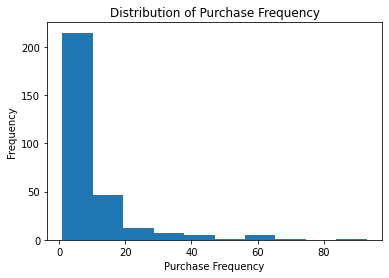

In [12]:
rfm_table['frequency'].plot.hist()
plt.title('Distribution of Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.ylabel('Frequency')
plt.show()

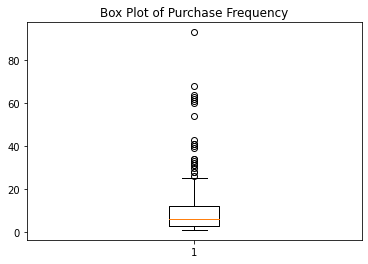

In [13]:
plt.boxplot(rfm_table['frequency'])
plt.title('Box Plot of Purchase Frequency')
plt.show()

In [14]:
rfm_table['frequency'].describe()

count    293.000000
mean      10.133106
std       12.397223
min        1.000000
25%        3.000000
50%        6.000000
75%       12.000000
max       93.000000
Name: frequency, dtype: float64

### Distribution of Purchase Monetary Value

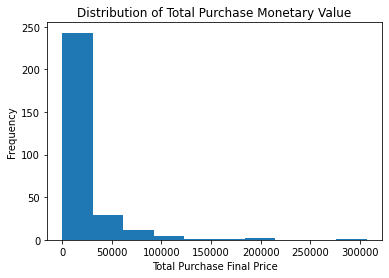

In [15]:
rfm_table['monetary_value'].plot.hist()
plt.title('Distribution of Total Purchase Monetary Value')
plt.xlabel('Total Purchase Final Price')
plt.ylabel('Frequency')
plt.show()

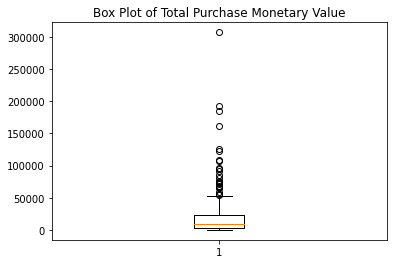

In [16]:
plt.boxplot(rfm_table['monetary_value'])
plt.title('Box Plot of Total Purchase Monetary Value')
plt.show()

In [17]:
rfm_table['monetary_value'].describe()

count       293.000000
mean      20070.560239
std       32301.949911
min          99.000000
25%        2823.000000
50%        9563.000000
75%       23576.000000
max      307045.290000
Name: monetary_value, dtype: float64

Inspecting the monetary value outlier

In [18]:
s = purchase_df.drop_duplicates('Invoice ID').groupby('Name').mean()['Final Price'].sort_values()

In [19]:
s

Name
G6M2R7        97.666667
G5M1R1        99.000000
G6M1R4       162.000000
G1M3R11      163.500000
G3M4R3       173.000000
               ...     
G6M3R11    15499.000000
G3M3R8     15999.833333
G5M4R20    18328.000000
G6M3R18    21348.111111
G5M4R11    49999.000000
Name: Final Price, Length: 293, dtype: float64

In [20]:
purchase_df[purchase_df['Name']=="G5M4R11"]

,Invoice ID,Name,Order Date,State,City,Categories,Subcategories,Ratings,Quantity,MRP,Final Price,GST%,City_Tier,Discount%,Delivery Fee%,Brand,Sale,Covid,Order_Date
1178,OD120851442511323000,G5M4R11,2021-01-26,Rajasthan,Kota,Mobiles & Accessories,Mobiles,4.6,1,49999.0,49999.0,18%,Tier 3,0,0,Apple,Yes,No,2021-01-26


In [21]:
purchase_df[purchase_df['Subcategories']=="Mobiles"]

,Invoice ID,Name,Order Date,State,City,Categories,Subcategories,Ratings,Quantity,MRP,Final Price,GST%,City_Tier,Discount%,Delivery Fee%,Brand,Sale,Covid,Order_Date
7,OD115235130186750000,G3M1R2,2019-04-17,Delhi,New Delhi,Mobiles & Accessories,Mobiles,3.7,1,20999.0,20999.0,12%,Tier_1,0,0,POCO,Yes,No,2019-04-17
17,OD120136831585343000,G3M1R6,2020-11-05,West Bengal,Ranghbaghi,Mobiles & Accessories,Mobiles,4.4,1,12999.0,12999.0,18%,Tier 3,0,0,POCO,No,1st Wave,2020-11-05
116,FAA40510881077968320,G3M2R1,2021-09-20,Karnataka,Tumkur,Mobiles & Accessories,Mobiles,4.4,1,399.0,399.0,0%,Tier 3,0,0,ZQRA,No,No,2021-09-20
208,FAA40697646423664359,G3M2R5,2020-10-17,Maharashtra,Nagpur,Mobiles & Accessories,Mobiles,4.2,1,12499.0,12499.0,18%,Tier_2,0,0,Samsung,Yes,1st Wave,2020-10-17
223,FAB17B1900435863,G3M3R1,2020-01-26,Maharashtra,Nashik,Mobiles & Accessories,Mobiles,4.5,1,10999.0,9898.0,12%,Tier_2,11,0,Redmi,No,No,2020-01-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2628,FAE3ZV2100282228,G1M2R5,2021-01-23,Maharashtra,Pune,Mobiles & Accessories,Mobiles,3.8,1,7999.0,7999.0,18%,Tier_1,0,0,POCO,Yes,No,2021-01-23
2680,FABYV52100449229,G1M2R10,2020-01-20,Kerala,Anakkayam,Mobiles & Accessories,Mobiles,4.3,1,6999.0,6999.0,18%,Tier 3,0,0,POCO,Yes,No,2020-01-20
2722,OD117794352444903000,G1M1R3,2020-07-02,Uttar Pradesh,Prayagraj,Mobiles & Accessories,Mobiles,4.3,1,6999.0,6999.0,12%,Tier_2,0,0,Redmi,No,No,2020-07-02
2813,OD117371774450258000,G5M3R1,2019-12-20,Chhattisgarh,Raipur,Mobiles & Accessories,Mobiles,4.5,1,9999.0,9999.0,12%,Tier_2,0,0,Redmi,No,No,2019-12-20


### Distribution of Recency

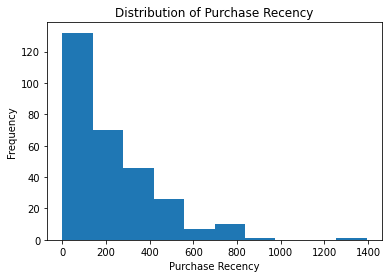

In [22]:
rfm_table['recency'].plot.hist()
plt.title('Distribution of Purchase Recency')
plt.xlabel('Purchase Recency')
plt.ylabel('Frequency')
plt.show()

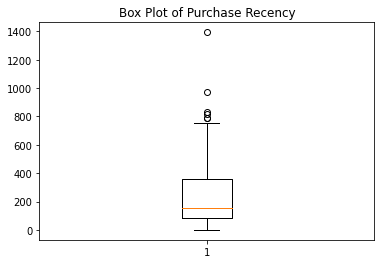

In [23]:
plt.boxplot(rfm_table['recency'])
plt.title('Box Plot of Purchase Recency')
plt.show()

In [24]:
rfm_table['recency'].describe()

count     293.000000
mean      232.443686
std       202.624056
min         0.000000
25%        81.000000
50%       157.000000
75%       356.000000
max      1394.000000
Name: recency, dtype: float64

## Export

In [26]:
# # Save to CSV
# rfm_table.to_csv('Data/rfm_table.csv', index=True)